In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

#data frame with t, id
def matrix_life_mask(times,max_time):
    ar = np.zeros(max_time)
    ar[times] = 1
    return ar

def make_life_mat(df):
    maxt = df.t.dropna().max()+1
    index = []
    mat = []
    for k,g in df.groupby("key"):
        l = list(g.t.dropna().values)
        vals = matrix_life_mask(l, maxt)
        index.append(k)
        mat.append(vals)
    return pd.DataFrame(mat, index=index)

def make_fluc_mat(df):
    return df[["epsilon", "key", "t"]].groupby(["t", "key"])[["epsilon"]].\
    mean().reset_index().pivot("key", "t", "epsilon").fillna(0)

In [6]:
df=pd.read_csv("../cached_data/augmented.txt")
df.t =df.t+1

fluc_mat = make_fluc_mat(df)
life_mat = make_life_mat(df)

bandd = life_mat.diff(1,axis=1,).fillna(0) #* lifetime_matrix
births = bandd[bandd==1].fillna(0)
deaths = np.abs(bandd[bandd==-1]).fillna(0)
ageMat = life_mat.cumsum(axis=1) * life_mat
KEY = "310717_Run0140"
life_mat.to_csv("../cached_data/lifemat_{}.txt".format(KEY),index=None)

In [4]:
life_mat

,0,1,2,3,4,5,6,7,8,9,...,568,569,570,571,572,573,574,575,576,577
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:

restricted = life_mat.sum(axis=1).reset_index()#.set_index("index")
restricted = life_mat[restricted[0]>1]
restricted.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
ageMat

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
# chk=df[20:].reset_index().drop("Unnamed: 0",1).drop("s", 1).drop("level_0",1).drop("index",1)
# chk.epsilon = chk.epsilon.fillna(0).round(4)
# chk[["key","t", "x", "y", "z", "epsilon"]].to_csv("raw.csv", index=None)

In [188]:
life_mat.astype(int).to_csv("life_matrix.csv", index=None)

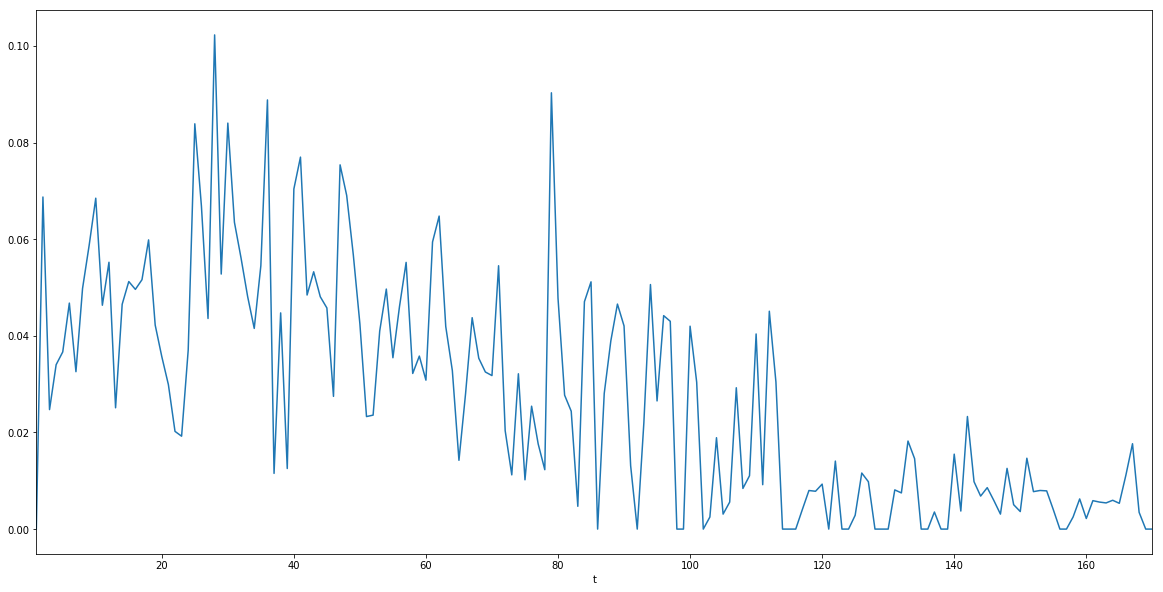

In [189]:
fluc_mat.mean().plot(figsize=(20,10))

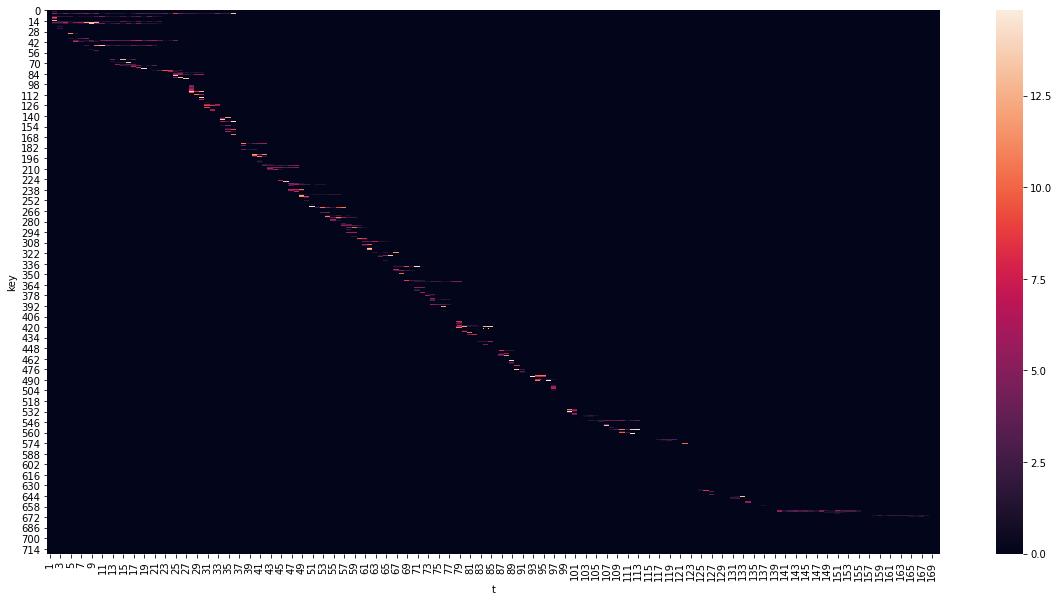

In [190]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(fluc_mat,)

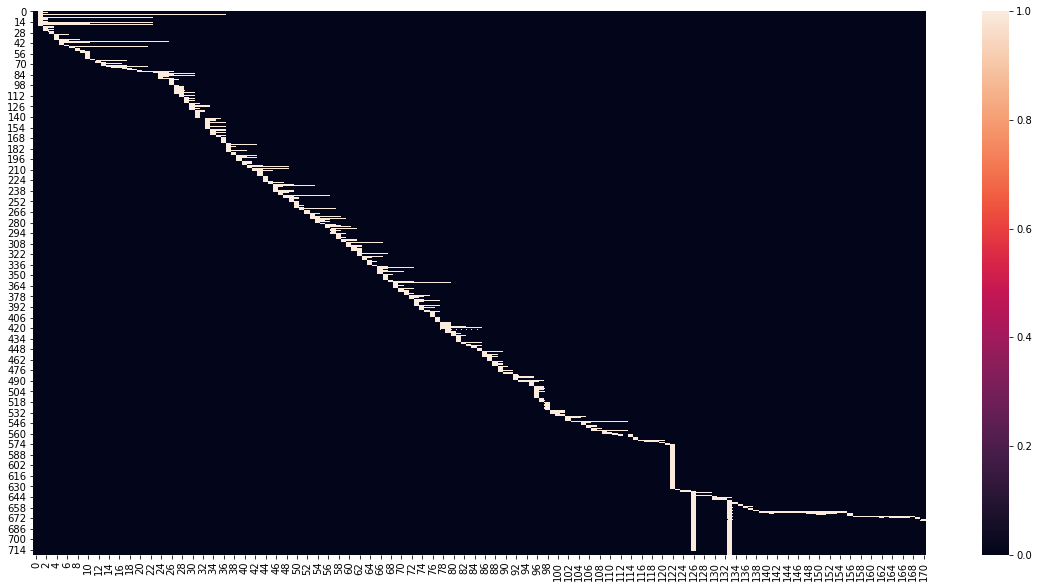

In [231]:
plt.figure(figsize=(20,10))
#life_mat_snap = make_life_mat(df[(df.t> 20) &(df.t< 50)])
sns.heatmap(life_mat)

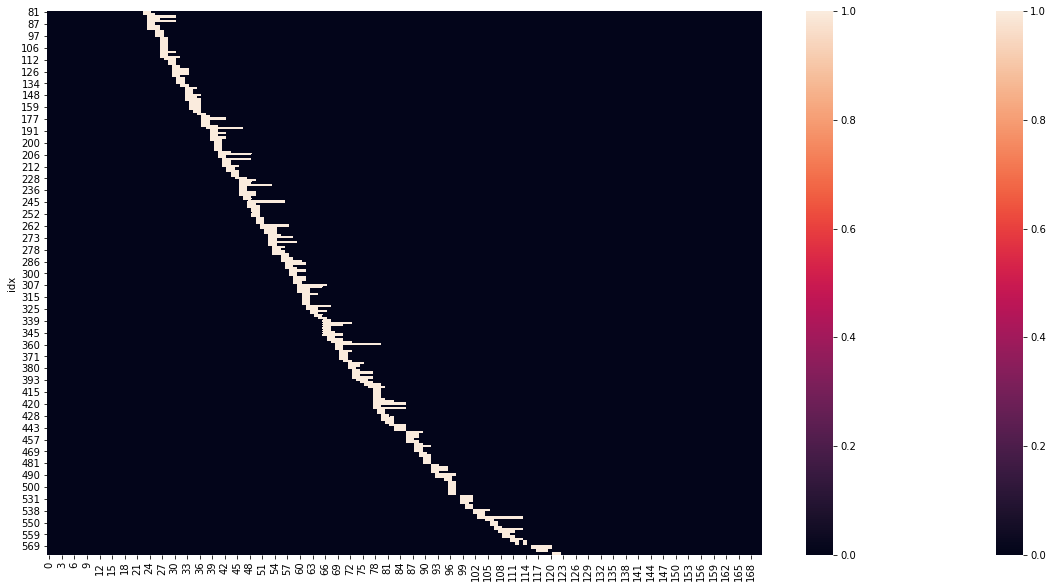

In [228]:
plt.figure(figsize=(20,10))
#life_mat_snap = make_life_mat(df[(df.t> 20) &(df.t< 50)])
sns.heatmap(life_mat)
restricted.index.name="idx"
wind_restricted = restricted[(restricted.index > 80) &(restricted.index < 600)]
sns.heatmap(wind_restricted)


,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
idx,,,,,,,,,,,,,,,,,,,,,
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
time = life_mat.sum(axis=0).reset_index().drop("index",1)
time.columns = ["alive"]
time["births"] = births.sum()
time["deaths"] = deaths.sum()
time["observed_by_t"] = births.sum().cumsum().astype(int)
time["mean_age_at_t"]  = ageMat.replace(0, np.nan).mean().round(2).fillna(0)
time.index.name = 't'
time = time.reset_index()
time
#time.to_csv("timeseries.csv",index=None)

,t,alive,births,deaths,observed_by_t,mean_age_at_t
0,0,0.0,0.0,0.0,0,0.00
1,1,21.0,21.0,0.0,21,1.00
2,2,17.0,6.0,10.0,27,1.65
3,3,13.0,4.0,8.0,31,2.15
4,4,14.0,8.0,7.0,39,2.29
5,5,15.0,6.0,5.0,45,2.80
6,6,15.0,2.0,2.0,47,3.67
7,7,13.0,3.0,5.0,50,4.46
8,8,15.0,4.0,2.0,54,4.73
9,9,13.0,2.0,4.0,56,5.85


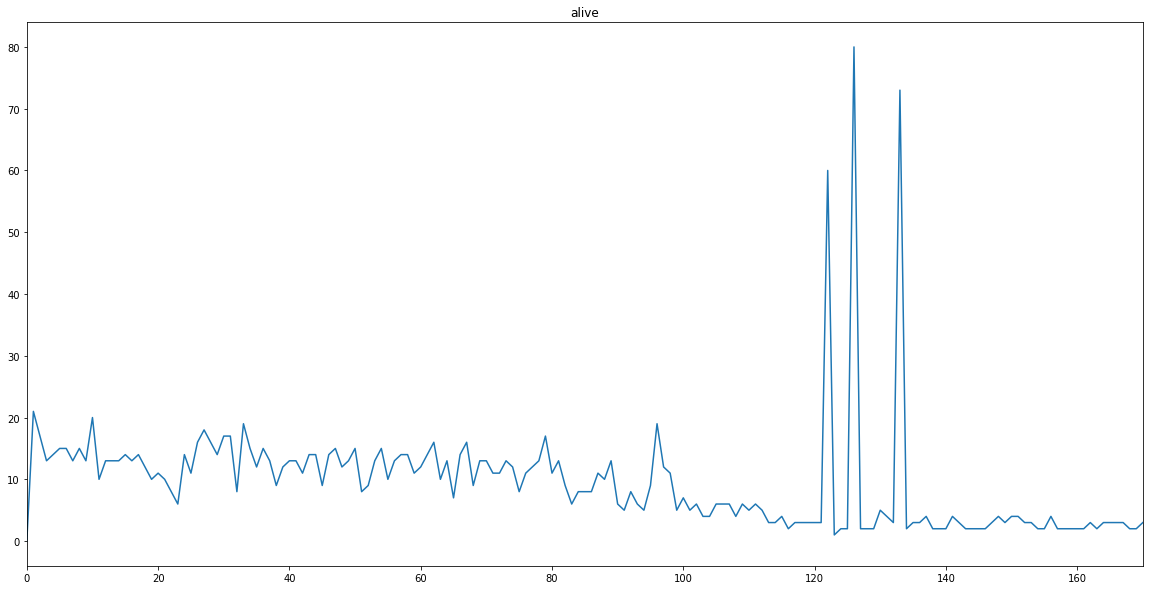

In [193]:
#alive
life_mat.sum(axis=0).plot(title="alive",figsize=(20,10))

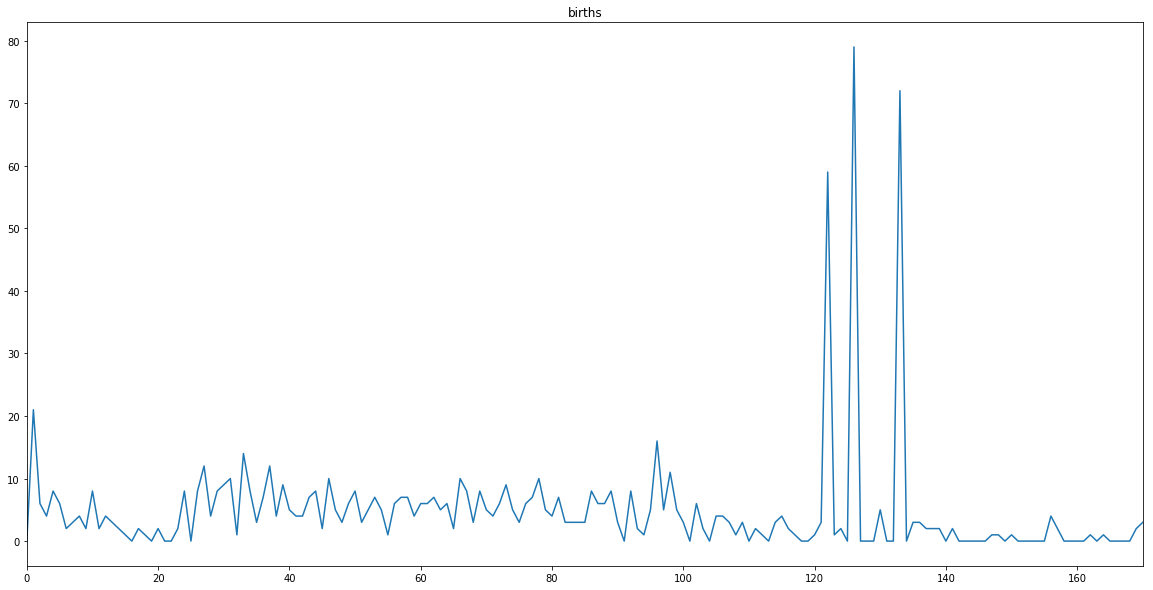

In [194]:
births.sum().plot(title="births",figsize=(20,10))

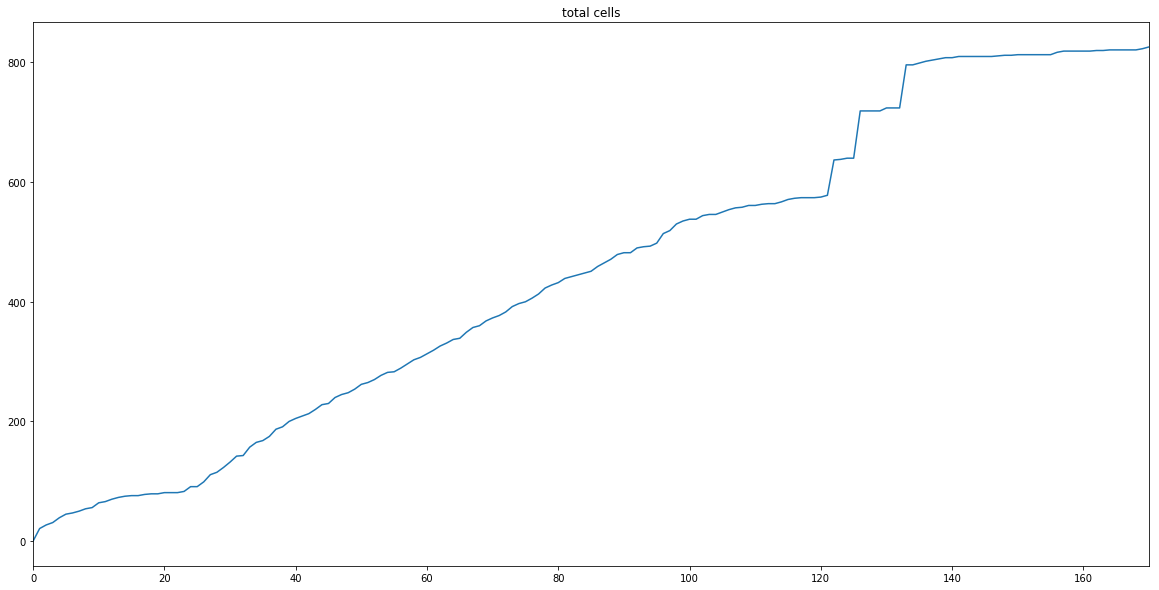

In [195]:
births.sum().cumsum().plot(title="total cells",figsize=(20,10))

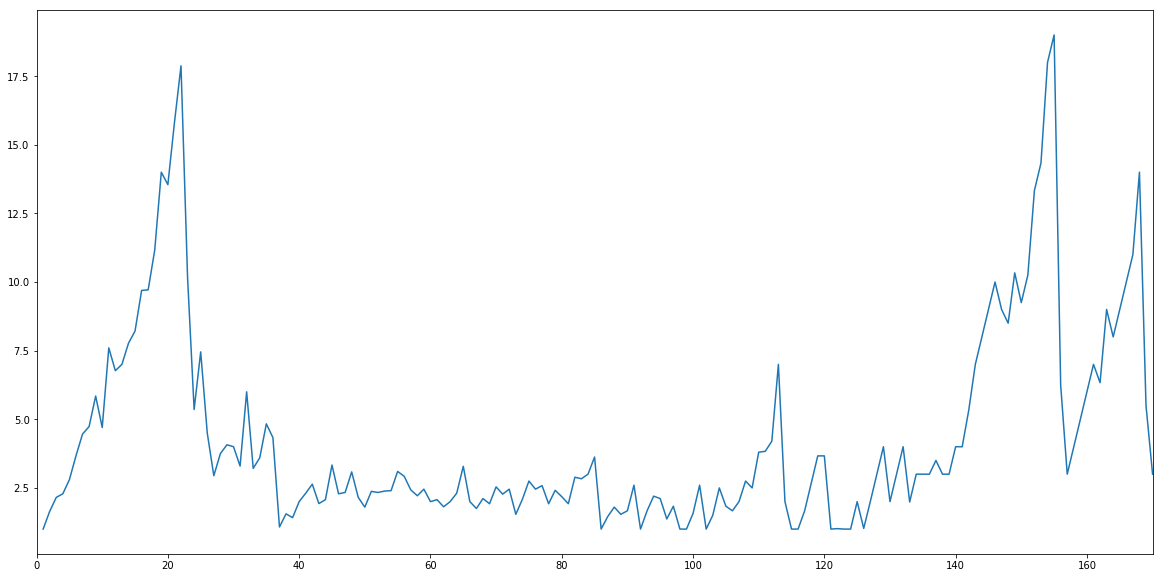

In [196]:
mean_age = ageMat.replace(0, np.nan).mean()
mean_age.plot(figsize=(20,10))

In [197]:
restricted = life_mat.sum(axis=1).reset_index()#.set_index("index")
restricted = life_mat[restricted[0]>1]
restricted.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


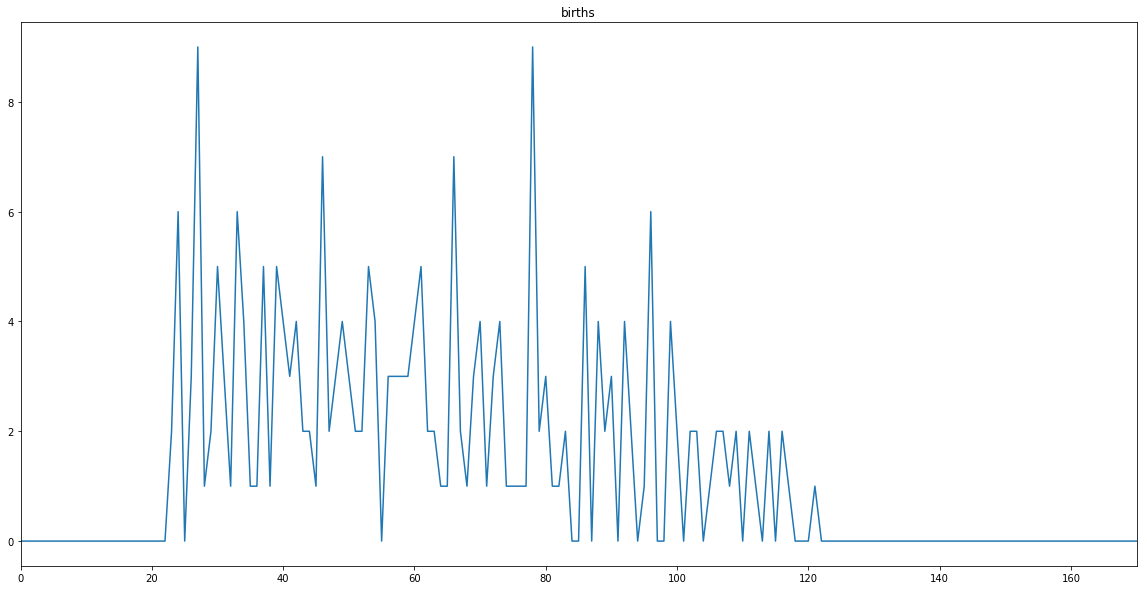

In [229]:
bandd = wind_restricted.diff(1,axis=1,).fillna(0) #* lifetime_matrix
births = bandd[bandd==1].fillna(0)
births.sum().plot(title="births",figsize=(20,10))

In [230]:
ts = births.sum().reset_index()
ts["minutes"]=ts["index"] * 15
ts["hours"] = ts["minutes"] / 60.
ts["days"] = ts["hours"] / 24.
ts = ts.rename(columns={0:"val"})
ts  = ts[["val", "hours", "minutes"]].set_index("hours")
ts

,val,minutes
hours,,
0.00,0.0,0
0.25,0.0,15
0.50,0.0,30
0.75,0.0,45
1.00,0.0,60
1.25,0.0,75
1.50,0.0,90
1.75,0.0,105
2.00,0.0,120


In [164]:
ts["pseudoDate"] = "1 jan 2012"
ts.pseudoDate = pd.to_datetime(ts.pseudoDate)
ts["pseudoDate"] = ts.pseudoDate + pd.to_timedelta(ts.minutes, "m")
ts = ts.set_index("pseudoDate")[["val"]]
ts = ts[ts >0].dropna()

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\mrsir\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [114]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\mrsir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
C:\Users\mrsir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


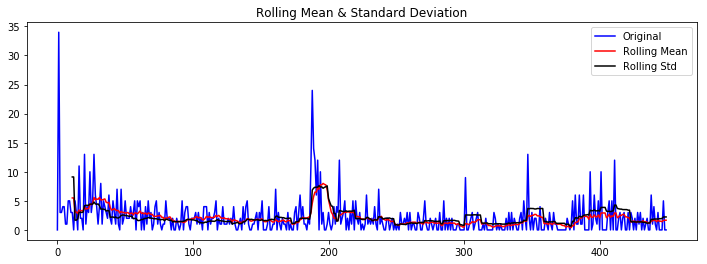

Results of Dickey-Fuller Test:
Test Statistic                -7.611535e+00
p-value                        2.248365e-11
#Lags Used                     3.000000e+00
Number of Observations Used    4.460000e+02
Critical Value (1%)           -3.445097e+00
Critical Value (5%)           -2.868042e+00
Critical Value (10%)          -2.570233e+00
dtype: float64


In [115]:
test_stationarity(ts.val.values)

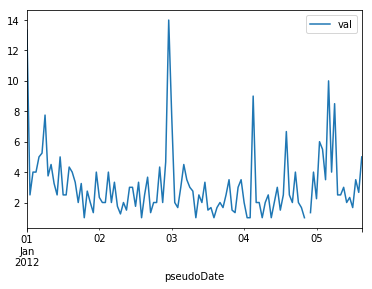

In [182]:
hts = ts.resample("h").mean()
hts.plot()


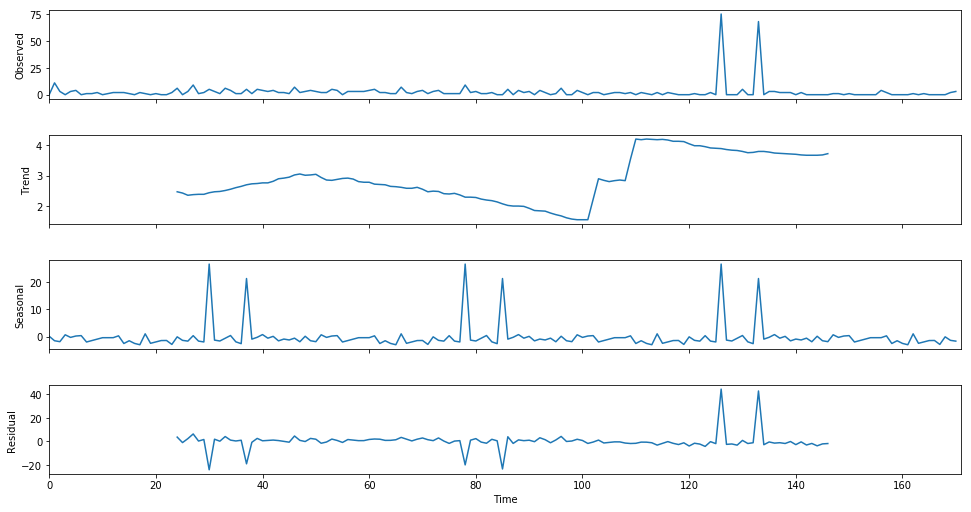

In [206]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts.val.values,freq=4*12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)


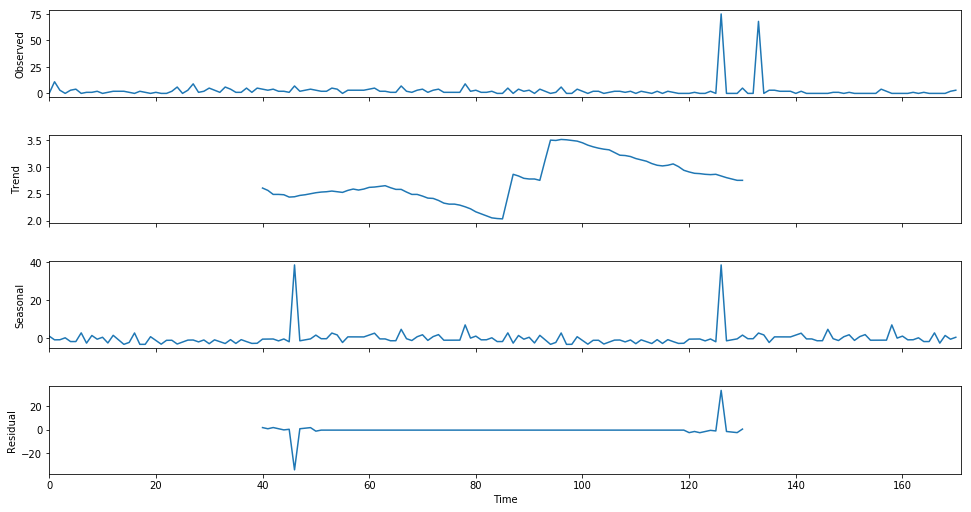

In [209]:
decomposition = seasonal_decompose(ts.val.values, freq=20*4)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [123]:
temp = pd.DataFrame(decomposition.seasonal)
temp[temp> 2.5].dropna()

,0
27,4.688648
28,5.688648
29,2.687086
30,3.441773
32,2.701148
107,4.688648
108,5.688648
109,2.687086
110,3.441773
112,2.701148


In [125]:
108/4

27.0

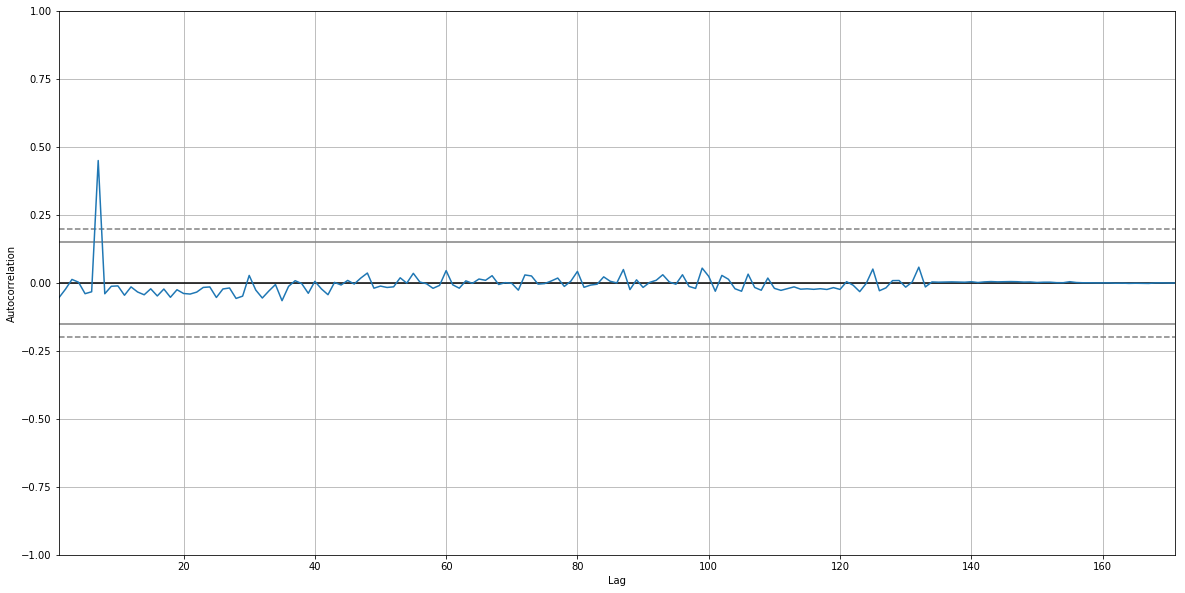

In [210]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,10))
autocorrelation_plot(ts.val)

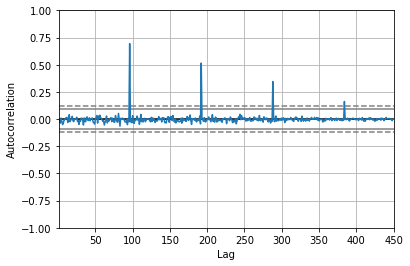

In [93]:
test = pd.DataFrame(index=ts.index).reset_index().set_index("hours")
import numpy as np
test["random"] = np.random.normal(5, 2, len(test)) 
test[::24*4] += 50
autocorrelation_plot(test.random)

In [96]:
dec = seasonal_decompose(test.random.values, freq=24*4)

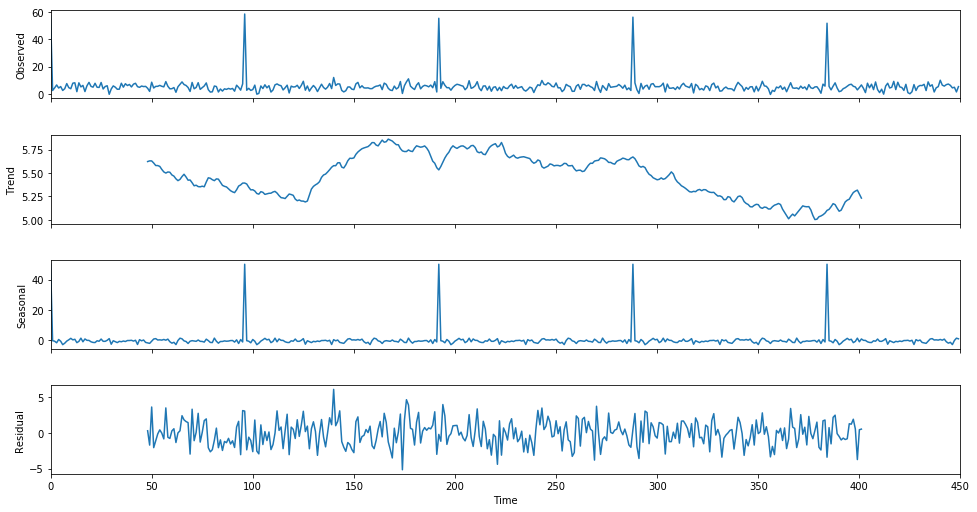

In [97]:
fig = plt.figure()  
fig = dec.plot()  
fig.set_size_inches(15, 8)